In [1]:
import pandas as pd
from pathlib import Path

In [2]:
from fastai.tabular.all import * 
from fastai.test_utils import show_install
from IPython.display import display, clear_output
import holidays
import seaborn as sns

show_install()




```text
=== Software === 
python       : 3.11.13
fastai       : 2.7.19
fastcore     : 1.7.29
fastprogress : 1.0.3
torch        : 2.6.0+cu124
torch cuda   : 12.4 / is **Not available** 

=== Hardware === 
No GPUs available 

=== Environment === 
platform     : Linux-5.15.0-144-generic-x86_64-with-glibc2.35
distro       : #157-Ubuntu SMP Mon Jun 16 07:33:10 UTC 2025
conda env    : Unknown
python       : /usr/bin/python3
sys.path     : /kaggle/working
/kaggle/working
/env/python
/opt/facets/facets_overview/python
/usr/lib/python311.zip
/usr/lib/python3.11
/usr/lib/python3.11/lib-dynload

/usr/local/lib/python3.11/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.11/dist-packages/IPython/extensions
/usr/local/lib/python3.11/dist-packages/setuptools/_vendor
/root/.ipython
no supported gpus found on this system
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) 

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cpu')

In [4]:
def set_seed_value(seed=718):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

set_seed_value()


In [5]:
path = Path('../input/tabular-playground-series-may-2022/')
Path.BASE_PATH = path
path.ls()


(#8) [Path('test.csv.zip'),Path('train.csv.zip'),Path('description.md'),Path('sample_submission.csv'),Path('tabular-playground-series-may-2022'),Path('train.csv'),Path('test.csv'),Path('sample_submission.csv.zip')]

In [6]:
train_df = pd.read_csv(os.path.join(path, 'train.csv')).set_index('id')
test_df = pd.read_csv(os.path.join(path, 'test.csv')).set_index('id')
sample_submission = pd.read_csv(os.path.join(path, 'sample_submission.csv'))

string_var = 'f_27'
dep_var = 'target'


In [7]:
train_df.isna().sum().sum(), test_df.isna().sum().sum(), train_df.isnull().sum().sum(), test_df.isnull().sum().sum()


(0, 0, 0, 0)

In [8]:
train_df.head()


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
id,,,,,,,,,,,,,,,,,,,,,
0,-0.249088,0.530642,0.335227,0.806819,-0.184190,-0.560442,1.253767,2,1,1,...,-1.100706,-0.078688,2.160728,0.002502,-0.827445,ACBADABECB,158.820720,0,1,1
1,-0.312833,0.033082,-0.571193,1.311494,0.991718,-0.138249,1.834627,2,1,2,...,1.089416,-2.701227,-1.846792,9.539707,2.443596,BBBCAAAFDE,211.389880,0,0,0
2,-0.370032,1.501016,0.288983,0.077866,-0.329701,0.030314,0.384582,1,3,1,...,0.313065,0.293554,-3.490299,2.002782,0.593525,BDAEAABICD,81.745258,1,0,0
3,-1.011059,-0.341850,1.415175,-2.128660,1.137287,-3.200017,0.289945,7,2,2,...,-0.626560,0.989921,-0.760995,-3.276785,-2.534943,BAABFADDCA,-644.638548,0,0,1
4,0.756528,0.503700,0.935057,-2.321849,-0.002466,0.058981,-0.163493,1,0,2,...,-1.504338,0.632537,1.812423,2.883524,-1.089711,AABFBBEMHC,-140.205455,0,2,1


array([[<Axes: title={'center': 'target'}>]], dtype=object)

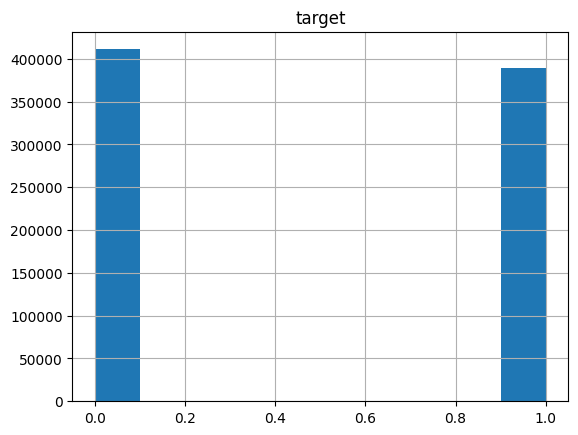

In [9]:
train_df.hist(column=dep_var)


In [10]:
corr = train_df.corr()

fig, axes = plt.subplots(figsize=(30, 15))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, linewidths=.5, annot=True, cmap='rainbow')

plt.show()


ValueError: could not convert string to float: 'ACBADABECB'

In [11]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 800000 entries, 0 to 799999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   f_00    800000 non-null  float64
 1   f_01    800000 non-null  float64
 2   f_02    800000 non-null  float64
 3   f_03    800000 non-null  float64
 4   f_04    800000 non-null  float64
 5   f_05    800000 non-null  float64
 6   f_06    800000 non-null  float64
 7   f_07    800000 non-null  int64  
 8   f_08    800000 non-null  int64  
 9   f_09    800000 non-null  int64  
 10  f_10    800000 non-null  int64  
 11  f_11    800000 non-null  int64  
 12  f_12    800000 non-null  int64  
 13  f_13    800000 non-null  int64  
 14  f_14    800000 non-null  int64  
 15  f_15    800000 non-null  int64  
 16  f_16    800000 non-null  int64  
 17  f_17    800000 non-null  int64  
 18  f_18    800000 non-null  int64  
 19  f_19    800000 non-null  float64
 20  f_20    800000 non-null  float64
 21  f_21    800000 

In [12]:
cat_columns = train_df.columns[(train_df.dtypes.values != np.dtype('float64'))]
cat_columns


Index(['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15',
       'f_16', 'f_17', 'f_18', 'f_27', 'f_29', 'f_30', 'target'],
      dtype='object')

In [13]:
for col in cat_columns:
    print('column ', col, ' number of unique values ', train_df[col].nunique())


column  f_07  number of unique values  16
column  f_08  number of unique values  16
column  f_09  number of unique values  15
column  f_10  number of unique values  15
column  f_11  number of unique values  14
column  f_12  number of unique values  15
column  f_13  number of unique values  13
column  f_14  number of unique values  14
column  f_15  number of unique values  15
column  f_16  number of unique values  16
column  f_17  number of unique values  14
column  f_18  number of unique values  14
column  f_27  number of unique values  670919
column  f_29  number of unique values  2
column  f_30  number of unique values  3
column  target  number of unique values  2


In [14]:
train_df[string_var].str.len().min(), train_df[string_var].str.len().max(), test_df[string_var].str.len().min(), test_df[string_var].str.len().max()


(10, 10, 10, 10)

In [15]:
def convert_feature_27(df, do_convert = True):
    if do_convert:
        for i in range(10):
            df[f'f_27_{i}'] = df[string_var].str.get(i)
    df.drop([string_var], axis=1, inplace=True)
    return df


In [16]:
train_df = convert_feature_27(train_df, do_convert=False)
test_df = convert_feature_27(test_df, do_convert=False)


In [17]:
train_df.shape, test_df.shape


((800000, 31), (100000, 30))

In [18]:
train_df.head()


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
id,,,,,,,,,,,,,,,,,,,,,
0,-0.249088,0.530642,0.335227,0.806819,-0.184190,-0.560442,1.253767,2,1,1,...,3.929629,-1.100706,-0.078688,2.160728,0.002502,-0.827445,158.820720,0,1,1
1,-0.312833,0.033082,-0.571193,1.311494,0.991718,-0.138249,1.834627,2,1,2,...,2.618636,1.089416,-2.701227,-1.846792,9.539707,2.443596,211.389880,0,0,0
2,-0.370032,1.501016,0.288983,0.077866,-0.329701,0.030314,0.384582,1,3,1,...,-4.053491,0.313065,0.293554,-3.490299,2.002782,0.593525,81.745258,1,0,0
3,-1.011059,-0.341850,1.415175,-2.128660,1.137287,-3.200017,0.289945,7,2,2,...,-1.792767,-0.626560,0.989921,-0.760995,-3.276785,-2.534943,-644.638548,0,0,1
4,0.756528,0.503700,0.935057,-2.321849,-0.002466,0.058981,-0.163493,1,0,2,...,-0.877557,-1.504338,0.632537,1.812423,2.883524,-1.089711,-140.205455,0,2,1


In [19]:
cont_vars, cat_vars = cont_cat_split(train_df, dep_var=dep_var, max_card=25)
len(cont_vars), len(cat_vars),cont_vars,cat_vars


(16,
 14,
 ['f_00',
  'f_01',
  'f_02',
  'f_03',
  'f_04',
  'f_05',
  'f_06',
  'f_19',
  'f_20',
  'f_21',
  'f_22',
  'f_23',
  'f_24',
  'f_25',
  'f_26',
  'f_28'],
 ['f_07',
  'f_08',
  'f_09',
  'f_10',
  'f_11',
  'f_12',
  'f_13',
  'f_14',
  'f_15',
  'f_16',
  'f_17',
  'f_18',
  'f_29',
  'f_30'])

In [20]:
def getData(df, batchSize=1024):
    
    to_train = TabularPandas(df, 
                           [Normalize, Categorify, FillMissing],
                           cat_names=cat_vars,
                           cont_names=cont_vars, 
                           splits=RandomSplitter(valid_pct=0.2)(df),  
                           device = device,
                           y_block=CategoryBlock(),
                           y_names=dep_var) 

    return to_train.dataloaders(bs=batchSize)


In [21]:
dls = getData(train_df, batchSize=2048)
len(dls.train), len(dls.valid)


(312, 79)

In [22]:
dls.show_batch()


,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_29,f_30,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,target
0,0,2,2,3,3,3,5,4,2,1,3,1,0,0,0.192003,-0.064127,-0.939833,-0.288280,-0.805796,-1.162394,-0.803422,-0.868960,2.859399,-0.834211,-4.095979,2.403101,-1.286501,0.183593,4.890030,-387.452407,1
1,0,5,4,1,0,0,4,1,2,1,1,0,1,1,0.869970,-1.043730,1.683328,-1.131279,1.689615,0.327794,0.481508,2.126198,0.787901,0.198963,-2.227583,-0.147324,0.863618,-0.148395,-1.106095,41.463944,1
2,1,0,3,2,2,0,2,1,4,2,1,2,1,1,1.789751,0.023496,1.939729,1.121247,0.350068,0.848354,0.256604,-1.541231,-1.115615,1.287918,2.200268,-3.449093,1.611514,-1.275687,1.590004,314.491574,1
3,2,3,1,1,1,3,0,2,2,4,1,2,0,1,-1.057733,0.638016,-1.219549,-0.363387,0.060446,1.893658,0.463358,-1.640066,2.826609,3.685200,-3.893702,-1.136715,0.314543,-1.358236,-0.416460,90.846306,1
4,1,1,1,3,3,1,1,3,3,1,3,3,0,0,-0.712912,0.892840,-0.609193,0.393084,0.230791,0.952410,-1.902838,-3.915220,1.786700,-0.864150,-3.575434,0.660047,2.761454,-5.840009,-3.715022,177.624099,0
5,1,1,4,2,3,3,1,0,2,1,5,2,0,0,-0.485335,-0.284979,0.387948,-0.732062,0.441352,-1.564453,-0.298113,1.374428,0.850304,-1.353858,-2.894727,2.357371,-0.609817,-4.041270,3.718815,-169.181330,1
6,1,0,2,1,0,4,5,3,1,3,0,4,0,0,-1.238264,-0.824102,-0.469459,-0.378271,0.529403,-2.159467,-0.794262,-2.423663,2.367709,4.617361,-0.881107,-0.247325,4.716877,0.864009,5.028078,-331.853192,1
7,1,1,3,2,2,3,1,1,4,1,4,1,0,1,-0.544614,0.340055,0.408348,-0.058418,-2.786238,1.639603,0.775536,-2.172012,-5.853018,2.575461,1.223471,3.490265,0.331414,3.390072,-2.213828,58.109927,0
8,1,0,3,5,1,2,3,0,0,1,4,1,0,1,-0.665223,1.482907,0.801508,-1.505260,-0.581874,-0.957513,0.699547,2.074793,2.712191,0.173179,-1.957150,-3.165889,-5.263582,3.706674,3.362034,-217.992083,0
9,0,1,3,2,3,1,4,4,3,6,1,2,0,0,1.054383,1.594804,-0.664740,0.502541,-0.196860,1.105906,-0.555592,2.100056,4.127219,5.279298,0.119611,-0.692114,-3.532513,-4.685915,1.231527,195.892886,0


In [23]:
my_config = tabular_config(y_range=(0,1) )
learn = tabular_learner(dls,
                       config = my_config,
                       metrics=[accuracy])

learn.summary()


TabularModel (Input shape: 2048 x 14)
Layer (type)         Output Shape         Param #    Trainable 
                     2048 x 8            
Embedding                                 136        True      
Embedding                                 136        True      
Embedding                                 128        True      
Embedding                                 128        True      
____________________________________________________________________________
                     2048 x 7            
Embedding                                 105        True      
____________________________________________________________________________
                     2048 x 8            
Embedding                                 128        True      
____________________________________________________________________________
                     2048 x 7            
Embedding                                 98         True      
Embedding                                 105      

SuggestedLRs(valley=0.0020892962347716093)

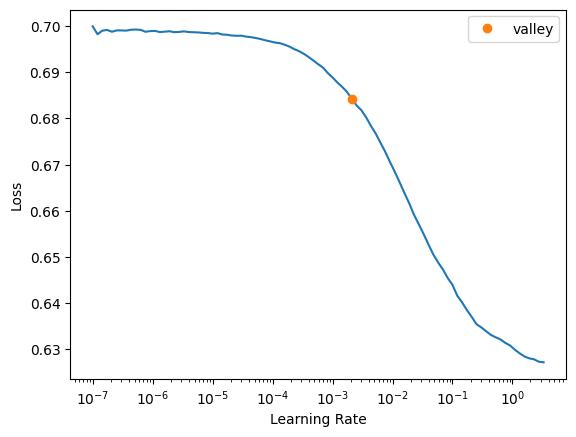

In [24]:
learn.lr_find()


In [25]:
learn.fit_one_cycle(50, 3e-3, cbs=SaveModelCallback(fname='kaggle_tps2022_may', with_opt=True))


epoch,train_loss,valid_loss,accuracy,time
0,0.576880,0.568064,0.734144,00:03
1,0.518223,0.512251,0.793869,00:03
2,0.481809,0.479939,0.827469,00:03
3,0.464371,0.465131,0.841963,00:03
4,0.453790,0.455126,0.852775,00:03
5,0.444249,0.446785,0.861212,00:03
6,0.436224,0.440659,0.867181,00:03
7,0.432379,0.434241,0.874144,00:03
8,0.428198,0.430749,0.878250,00:03
9,0.426074,0.431290,0.877419,00:03


Better model found at epoch 0 with valid_loss value: 0.5680638551712036.
Better model found at epoch 1 with valid_loss value: 0.5122513175010681.
Better model found at epoch 2 with valid_loss value: 0.4799394905567169.
Better model found at epoch 3 with valid_loss value: 0.4651309549808502.
Better model found at epoch 4 with valid_loss value: 0.4551260769367218.
Better model found at epoch 5 with valid_loss value: 0.4467853903770447.
Better model found at epoch 6 with valid_loss value: 0.44065943360328674.
Better model found at epoch 7 with valid_loss value: 0.43424052000045776.
Better model found at epoch 8 with valid_loss value: 0.4307490587234497.
Better model found at epoch 11 with valid_loss value: 0.4267134666442871.
Better model found at epoch 13 with valid_loss value: 0.4236915409564972.
Better model found at epoch 14 with valid_loss value: 0.42209193110466003.
Better model found at epoch 15 with valid_loss value: 0.42207983136177063.
Better model found at epoch 16 with valid_l

UnpicklingError: Exception occured in `SaveModelCallback` when calling event `after_fit`:
	Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL numpy.core.multiarray.scalar was not an allowed global by default. Please use `torch.serialization.add_safe_globals([scalar])` or the `torch.serialization.safe_globals([scalar])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

In [26]:
learn.show_results()


,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_29,f_30,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,target,target_pred
0,6.0,7.0,4.0,1.0,2.0,4.0,5.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,0.546921,-0.430648,-0.790809,1.606395,1.217211,0.971478,0.069280,-1.369618,-0.453703,-1.394776,0.613360,1.022705,2.452073,-2.335638,-2.769816,0.431793,0.0,0.0
1,2.0,2.0,4.0,6.0,4.0,5.0,3.0,1.0,2.0,2.0,4.0,1.0,2.0,2.0,0.048374,0.365102,-2.396055,-0.079712,0.346059,-1.797441,-0.701684,0.070537,-1.541919,0.484101,1.224608,-0.402665,0.114421,0.493386,-0.241621,-2.446367,1.0,0.0
2,5.0,1.0,3.0,2.0,3.0,5.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.291206,-0.925059,-1.482173,0.003319,1.042096,-1.009681,0.730634,-2.028296,0.602241,1.054110,-0.055781,0.535304,1.362483,-1.531143,-0.498001,0.346861,1.0,1.0
3,1.0,2.0,5.0,5.0,5.0,3.0,2.0,1.0,2.0,1.0,3.0,3.0,1.0,2.0,-1.914413,-0.928489,-2.389020,1.928427,1.019983,-1.479433,0.404742,0.382541,0.516466,-0.899603,-1.350898,-0.746188,0.732523,-0.909262,-0.054659,-0.199167,0.0,0.0
4,2.0,2.0,8.0,5.0,2.0,2.0,1.0,2.0,1.0,5.0,2.0,2.0,2.0,2.0,0.553031,0.949516,1.877867,0.587757,-0.054116,-0.565637,-1.172533,0.950696,-3.076413,0.271277,0.805197,0.852678,-1.598100,1.896315,-0.367291,0.482626,0.0,0.0
5,5.0,3.0,4.0,2.0,1.0,4.0,1.0,2.0,4.0,4.0,4.0,5.0,1.0,2.0,-0.033077,0.475756,1.297355,1.663818,-0.786712,0.156588,0.846377,-0.014406,-1.500233,-0.013002,-0.606473,-0.117108,0.973828,-1.943223,0.029748,1.967134,0.0,0.0
6,2.0,4.0,1.0,2.0,5.0,3.0,5.0,5.0,2.0,4.0,2.0,3.0,2.0,1.0,0.351362,1.675971,0.046255,-0.809740,0.590733,0.472788,0.363367,0.794178,-1.436650,1.038764,-1.087749,1.575467,-1.634993,-0.376303,0.807877,-0.475615,0.0,0.0
7,5.0,4.0,3.0,2.0,1.0,6.0,6.0,2.0,4.0,4.0,1.0,1.0,2.0,1.0,-0.919602,-0.300913,0.358519,-1.179497,1.167415,0.983300,-0.737636,-2.431765,0.029012,0.283146,0.884992,-0.060711,0.214669,1.905962,0.370396,-0.244642,0.0,0.0
8,5.0,3.0,5.0,5.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,-0.972131,0.011816,1.218455,1.199945,0.891843,0.280360,0.193768,0.657426,-0.771558,0.476853,-2.410560,-0.569784,-0.380826,0.690841,0.968390,-0.059719,0.0,0.0


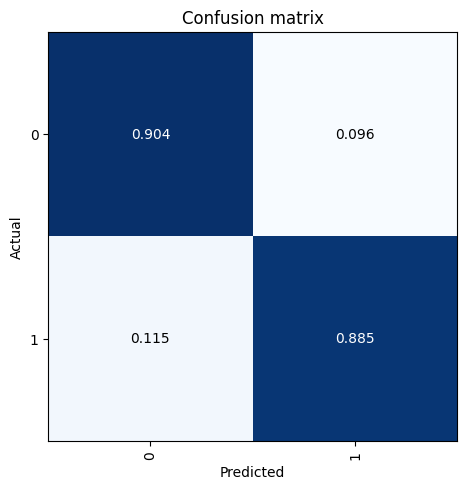

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(normalize=True, norm_dec=3)


In [28]:
learn.load('kaggle_tps2022_may')


UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL numpy.core.multiarray.scalar was not an allowed global by default. Please use `torch.serialization.add_safe_globals([scalar])` or the `torch.serialization.safe_globals([scalar])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

In [29]:
dlt = learn.dls.test_dl(test_df, bs=1024) 
nn_preds,_ ,preds = learn.get_preds(dl=dlt , with_decoded=True) 

nn_preds, preds


(tensor([[0.2689, 0.7311],
         [0.7286, 0.2714],
         [0.2689, 0.7311],
         ...,
         [0.7311, 0.2689],
         [0.2689, 0.7311],
         [0.7311, 0.2689]]),
 tensor([1, 0, 1,  ..., 0, 1, 0]))

In [30]:
sample_submission[dep_var] = np.argmax(nn_preds, axis=-1)
sample_submission.to_csv("submission.csv", index=False)
sample_submission.head(10)


,id,target
0,800000,1
1,800001,0
2,800002,1
3,800003,1
4,800004,0
5,800005,1
6,800006,0
7,800007,0
8,800008,0
9,800009,0


array([[<Axes: title={'center': 'target'}>]], dtype=object)

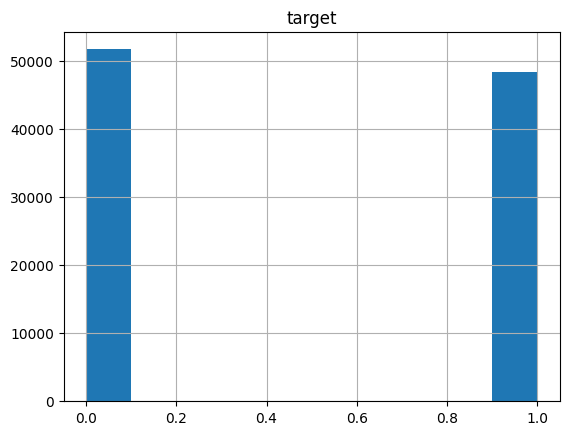

In [31]:
sample_submission.hist(column=dep_var)


In [32]:
!ls -al


total 922
drwxrw-rw- 4 11132 10513   4096 Aug 18 21:31 .
drwxr-xr-x 1 root  root    4096 Aug 18 21:27 ..
drwxr-xr-x 2 root  root    4096 Aug 18 21:28 models
-rw-r--r-- 1 root  root  900010 Aug 18 21:31 submission.csv
drwxrwxrwx 3 11132 10513     10 Aug 16 16:33 tabular-playground-series-may-2022
-rw-rw-rw- 1 11132 10513   9917 Aug 18 21:27 tabular-playground-series-may-2022_casati8_kaggle-tps2022-may-fastai-baseline_v4_C1.ipynb
